# Used Car Price Prediction using Machine Learning

In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
print("Necessary libraries successfully imported.")

Necessary libraries successfully imported.


Importing All the necessary libraries.

# Reading and Understanding the (Scraped) Data

In [3]:
df = pd.read_csv('CarPrice.csv')
df.head()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000


Here we read the Excel file in jupyter notebook.

In [4]:
df = pd.DataFrame(data=df)
df.tail()

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000
5049,maruti suzuki swift dzire (2019),VXI,Diesel,"58,000 Km",Manual,1st Owner,"Kukatpally, Hyderabad",01/23/2022,580000


Here we are loading the dataset into DataFrame.

# Data Inspection

In [5]:
df.shape

(5050, 9)

There are 5050 rows and 9 columns in the dataset.

In [6]:
df.dtypes

Brand & Model         object
Varient               object
Fuel Type             object
Driven Kilometers     object
Transmission          object
Owner                 object
Location              object
Date of Posting Ad    object
Price (in ₹)           int64
dtype: object

All the columns are of object datatype except the target variable, 'Price (in ₹)' which is of integer data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


There are 9 columns and varient column have null values and all the columns are of object data type except 'Price (in ₹)' which is of integer data type. The total memory usage of this dataset is 355.2 KB.

In [8]:
df.columns

Index(['Brand & Model', 'Varient', 'Fuel Type', 'Driven Kilometers',
       'Transmission', 'Owner', 'Location', 'Date of Posting Ad',
       'Price (in ₹)'],
      dtype='object')

There are 9 columns:
1. 'Brand & Model' : It gives us the brand of the car alongwith its model name and manufacturing year
2. 'Varient' : It gives us the varient of particular car model
3. 'Fuel Type' : It gives us the type of fuel used by the car
4. 'Driven Kilometers' : It gives us the total distance in kms covered by car
5. 'Transmission' : It tells us whether the gear transmission is Manual or Automatic
6. 'Owner' : It tells us the total numbers of owners car had previously
7. 'Location' : It gives us the locaion of the car
8. 'Date of Posting Ad' : It teels us when the advertisement for selling that car was posted online
9. 'Price (in ₹)' : It gives us the price of the car.
   
Here 'Price (in ₹)' is our target variable.        

# Data Cleaning

In [9]:
#Checking for Null values
df.isnull().sum()

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

There are 39 null values in column 'Varient' and since it is of object type, we will use Mode to fill the rows with null value.

<AxesSubplot:>

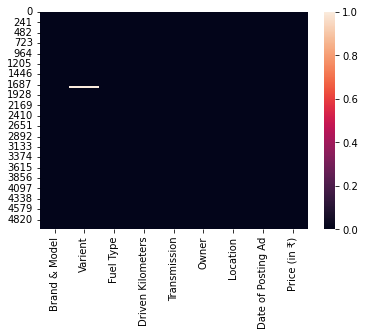

In [11]:
sn.heatmap(df.isnull())

This is the visualization of having just a small number null values in the dataset.

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Varient']=imp.fit_transform(df['Varient'].values.reshape(-1,1))

Treating the null values with mode using Simple Imputer

In [13]:
#Checking for Null values
df.isnull().sum()

Brand & Model         0
Varient               0
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64

Now there are no null values in the dataset.

In [14]:
#Checking for outliers and Skewness

Since all the variables are of object data type, we will not check for outliers or skewness.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Price (in ₹)'>

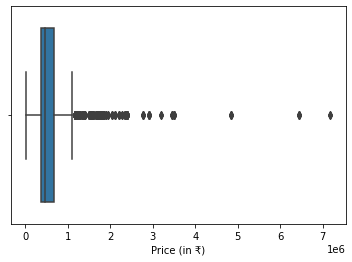

In [15]:
sn.boxplot(df['Price (in ₹)'])

There are many outliers but since it's the target variable, hence we will not treat the outliers.

<AxesSubplot:xlabel='Price (in ₹)', ylabel='Density'>

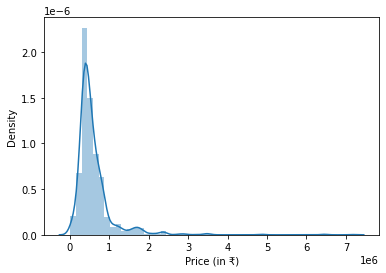

In [16]:
sn.distplot(df['Price (in ₹)'])

The data is very tightly distributed here and is almost normalized.

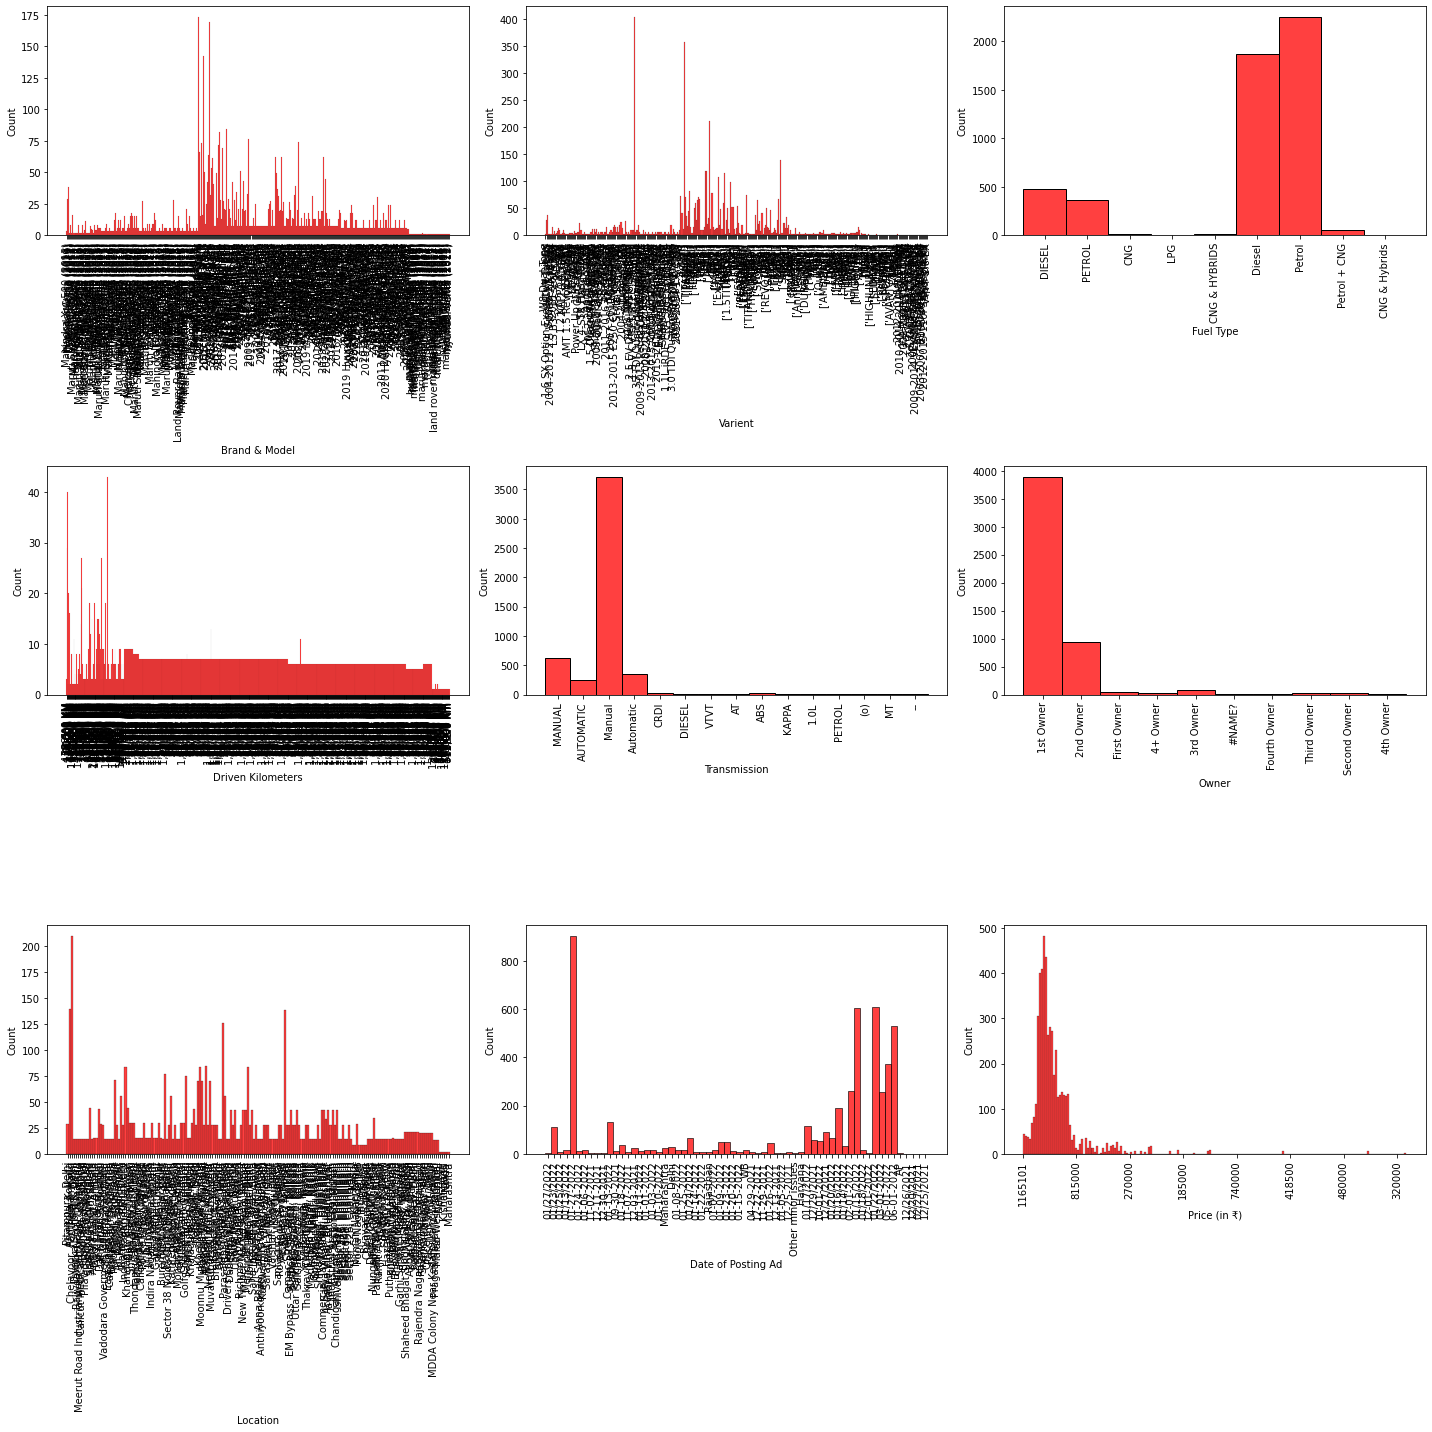

In [17]:
collist=df.columns.values
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

~ Brands, Varients, Driven Kilometers & Location have a wide range of values in them. 

~ Maximum Cars run on either Petrol or diesel. Only few goes for CNG and other fuels.

~ Maximum Cars have Manual transnission.

~ Maximum cars are being sold by their very 1st Owner.

~ We have collected the cars posted online in last one month, from 25th December 2021 to 27th January 2022.

~ Almost all the cars have a price rnging in between 270000 to 1165101. 

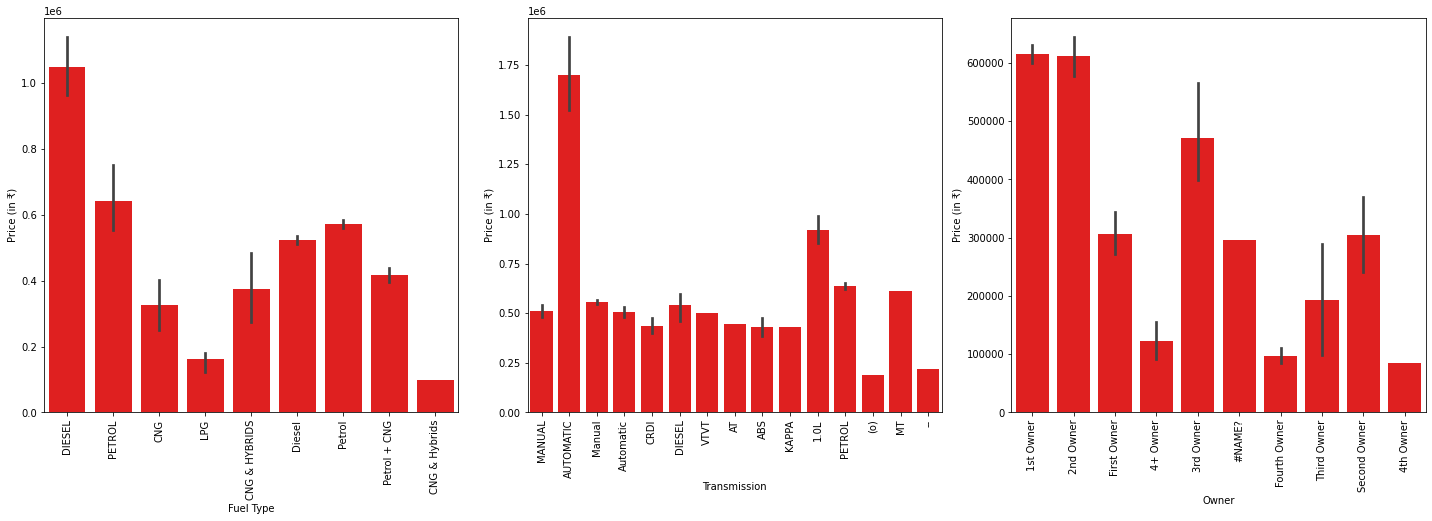

In [18]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.barplot(data=df,x=i[1],y='Price (in ₹)',color='red')
    plt.xticks(rotation=90)
    plt.tight_layout()

Since Brands, Varients, Driven Kilometers & Location have a wide range of values in them, we will not perform bivariate analysis for them as they will not give us any specific details. Now by plotting graph of Fuel type, Transmission and Owner against Price, we conclude that Car that uses Diesel, have automatic Transmission and Has only 1 owner is more likely to have a high price.

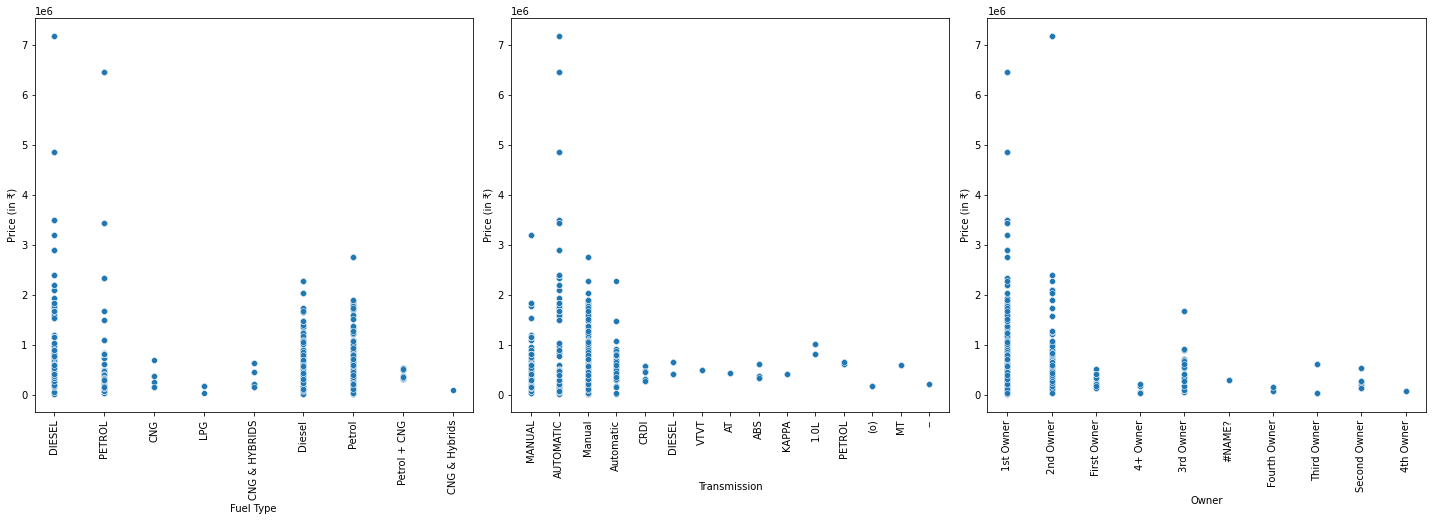

In [19]:
newcollist=['Fuel Type','Transmission','Owner']
plt.figure(figsize=(20,20))
for i in enumerate(newcollist):
    plt.subplot(3,3,i[0]+1)
    sn.scatterplot(data=df,x=i[1],y='Price (in ₹)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    

Just like bar graph, we can see that Price range is likely to be high for cars using Diesel as fuel, or having Automatic Transmission or is owned by only 1 Owner.

In [20]:
le = LabelEncoder()
for column in df.drop(['Price (in ₹)'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df    

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


Transforming the data from object to ordinal type.

# Multivariate Analysis

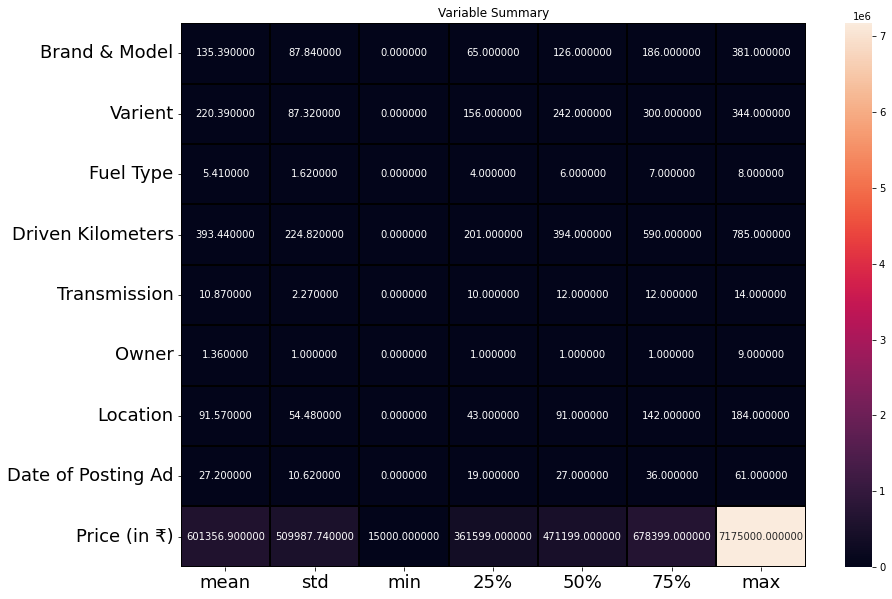

In [21]:
plt.figure(figsize=(14,10))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Variable Summary')
plt.show()

It gives us the statistical summary(which includes mean, median, standard deviation, minimum value, maximum value and quartile values) of all the numerical columns.

<AxesSubplot:>

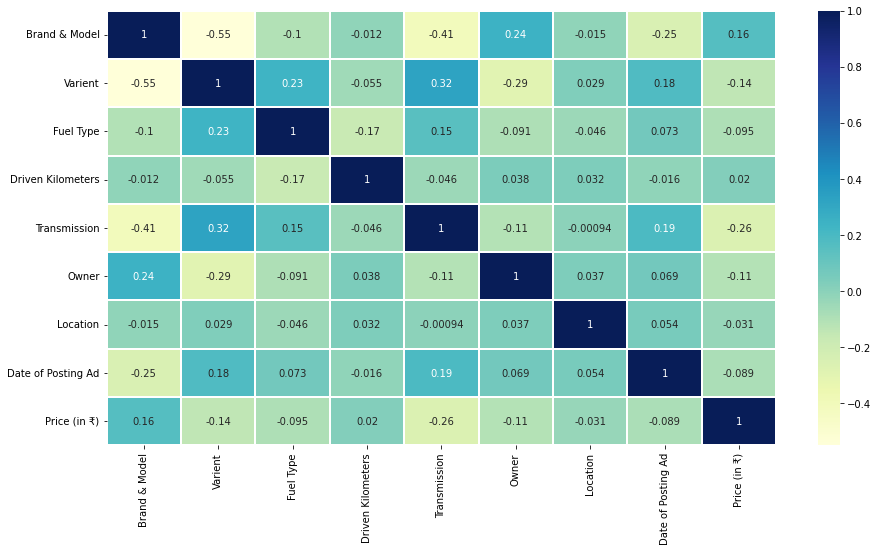

In [22]:
plt.figure(figsize=(15,8))
sn.heatmap(df.corr(), linewidth=0.1, cmap="YlGnBu", annot = True)

There is no multicollinearity in the dataset.

# Model Building

In [23]:
x= df.drop(['Price (in ₹)'],axis=1)
y=df['Price (in ₹)']

Separating feature and target variables into x and y.

In [24]:
x=power_transform(x,method='yeo-johnson')
scale = StandardScaler()
x=scale.fit_transform(x)

Power transforming and scaling the feature variables.

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 45)
svr = SVR()
svr.fit(xtrain,ytrain)
pred_train_svr=svr.predict(xtrain)
pred_test_svr=svr.predict(xtest)
print('SVR Regressor Score:',svr.score(xtrain,ytrain))
print('SVR Regressor r2_score:',r2_score(ytest,pred_test_svr))
print("Mean squared error of SVR Regressor:",mean_squared_error(ytest,pred_test_svr))
print("Root Mean Square error of SVR Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_svr)))

SVR Regressor Score: -0.06325370730174851
SVR Regressor r2_score: -0.06820672247987791
Mean squared error of SVR Regressor: 297284446193.9865
Root Mean Square error of SVR Regressor: 545237.9720764012


The Accuracy of SVR is in negative which stats that this is not the correct model to apply here.

In [26]:
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('Linear Regression Score:',lr.score(xtrain,ytrain))
print('Linear Regression r2_score:',r2_score(ytest,pred_test))
print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))

Linear Regression Score: 0.055020586349048384
Linear Regression r2_score: 0.06136471313914871
Mean squared error of Linear Regression: 261224410556.74805
Root Mean Square error of Linear Regression: 511101.1744818711


The accuracy of Linear Regression is only 6%

In [27]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
pred_train_sgd=sgd.predict(xtrain)
pred_test_sgd=sgd.predict(xtest)
print('SGD Regressor Score:',sgd.score(xtrain,ytrain))
print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))

SGD Regressor Score: 0.05335773457211279
SGD Regressor r2_score: 0.059669801402192024
Mean squared error of SGD Regressor: 261696108484.18582
Root Mean Square error of SGD Regressor: 511562.4189521605


The accuracy of SGD Regressor is also very poor, it's only 6%

In [28]:
knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
pred_train_knr=knr.predict(xtrain)
pred_test_knr=knr.predict(xtest)
print('K Neighbors Regressor Score:',knr.score(xtrain,ytrain))
print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))

K Neighbors Regressor Score: 0.7482974029931317
K Neighbors Regressor r2_score: 0.6045261241639399
Mean squared error of K Neighbors Regressor: 110061310875.45856
Root Mean Square error of K Neighbors Regressor: 331754.89578220027


The accuracy of K Neighbors Regressor is 60% which is okay.

In [29]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
pred_train_dtr=dtr.predict(xtrain)
pred_test_dtr=dtr.predict(xtest)
print('Decision Tree Regressor Score:',dtr.score(xtrain,ytrain))
print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))

Decision Tree Regressor Score: 0.9979397374843745
Decision Tree Regressor r2_score: 0.7997148601926364
Mean squared error of Decision Tree Regressor: 55739826023.833
Root Mean Square error of Decision Tree Regressor: 236092.8334868151


The accuracy of Decision Tree Regressor is 80.2 % which is in acceptable range.

In [30]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_train_rf=rf.predict(xtrain)
pred_test_rf=rf.predict(xtest)
print('Random Forest Regressor Score:',rf.score(xtrain,ytrain))
print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))

Random Forest Regressor Score: 0.9820478976421301
Random Forest Regressor r2_score: 0.882840197496713
Mean squared error of Random Forest Regressor: 32605848915.206203
Root Mean Square error of Random Forest Regressor: 180570.89719887366


The accuracy of Random Forest Regressor is 87.56% which is quite good. 

# Cross Validation Score

In [31]:
print('Cross Validation Score of SVR is',(cvs(svr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Linear Regression is',(cvs(lr,x,y,cv=5).mean())*100)
print('Cross Validation Score of SGD Regressor is',(cvs(sgd,x,y,cv=5).mean())*100)
print('Cross Validation Score of KNeighbors Regressor is',(cvs(knr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Decision Tree Regressor is',(cvs(dtr,x,y,cv=5).mean())*100)
print('Cross Validation Score of Random Forest Regressor is',(cvs(rf,x,y,cv=5).mean())*100)

Cross Validation Score of SVR is -6.937914977243179
Cross Validation Score of Linear Regression is -3.979872647154277
Cross Validation Score of SGD Regressor is -3.694941528483142
Cross Validation Score of KNeighbors Regressor is 41.90766313041919
Cross Validation Score of Decision Tree Regressor is 51.63735652596515
Cross Validation Score of Random Forest Regressor is 78.40253489791414


After comparing r2_score and Cross validation score, we will select Random Forest Regressor for Hyper Parameter Tuning.

# Hyper Parameter Tuning

In [32]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Getting all the best parameter to apply in our selected model.

In [33]:
pricecar = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
pricecar.fit(xtrain,ytrain)
pred=pricecar.predict(xtest)
acc=r2_score(ytest,pred)
print('Score of Hyper Parameter Tuned Ranfom Forest Regressor is:',pricecar.score(xtrain,ytrain))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(ytest,pred))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred)))

Score of Hyper Parameter Tuned Ranfom Forest Regressor is: 0.9979397374843745
Accuracy for predicting price of car is 87.5094443014659 %
Mean squared error of Hyper Parameter Tuned Random Forest Regressor: 34761510626.64555
Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor: 186444.3901720981


The accuracy of Model 'PriceCar' (Random Forest Regressor) after applying Hyper Tuned Parameters is found to be 87.79% and the score is 0.98 which is quite good.

# Conclusion

In [34]:
a= np.array(ytest)
predicted = np.array(pricecar.predict(xtest))
Price=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
Price

,Original,Predicted
0,675000,675000.0
1,619899,619899.0
2,528199,528199.0
3,380000,380000.0
4,303799,303799.0
...,...,...
1510,776799,776799.0
1511,384899,516955.0
1512,391599,492805.0
1513,502699,502699.0


Here, we can see that all the predicted prices are either equal or nearly equal to the original prices of the car. Hence we conclude that our model 'pricecar' is working very well. And we shall save it for further use.

# Model Saving

In [35]:
import pickle
filename = 'PriceCar.pkl'
pickle.dump(pricecar,open(filename,'wb'))

We have saved our best model.